**Applied Machine Learning - Homework 5 - Task3**

Amaury Sudrie (UNI: AS5961)
Maxime Tchibozo (UNI: MT3390)

Foreword: Some of the methods used in this notebook are highly computationally and memory intensive. To run this code, we used Google Colab notebooks, and we encourage you to do the same.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("drive/My Drive/AML/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split

import keras

from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D, Add

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

Using TensorFlow backend.


## **Preprocessing**

For processing speed purpose we will store the dataset as a numpy array in an external file (.npy)

In [0]:
def load_training_data():

  X_train = np.ndarray((27560, 100, 100, 3), dtype=np.uint8)
  Y_train = np.zeros((27560,), dtype='uint8')

  # Load training images
  train_data_dir = 'cell_images/'
  labels = os.listdir(train_data_dir)
  total = len(labels)    

  i = 0
  print('-'*30)
  print('Creating training images...')
  print('-'*30)
  j = 0
  for label in labels:
    image_names_train = os.listdir(os.path.join(train_data_dir, label))
    total = len(image_names_train)
    print(label, total)
    for image_name in image_names_train:
      try:
        img = cv2.imread(os.path.join(train_data_dir, label, image_name), cv2.IMREAD_COLOR)
        img = cv2.resize(img, (100,100))
        img = np.array([img])
        X_train[i] = img
        Y_train[i] = j

        if i % 1000 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
      except:
        continue
    j += 1    
  print(i)                
  print('Loading done.')
    
  print('Transform targets to keras compatible format.')
  Y_train = np_utils.to_categorical(Y_train, 2)

  np.save('imgs_train.npy', X_train, Y_train)
  return X_train, Y_train

In [0]:
#X,y = load_training_data()

**train_test_split** shuffle naturally the data set.

In [0]:
X = np.load('imgs_train.npy')
X = X.astype('float32') 
X /= 255 

y = np.zeros((27560,2))

for i in range(13780):
  y[i,:] = np.array([1,0])

for i in range(13780,27560):
  y[i,:] = np.array([0,1])


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Now we free some memory

In [0]:
del(X)
del(y)

## **Question 3.1**

Start with a convolutional model without residual connections (using batch normalization is likely to be helpful and you should try it, whether you use dropout is your choice).


In [0]:
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(100,100,3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(BatchNormalization())

cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(BatchNormalization())

cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(2, activation='softmax'))

cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
#cnn.summary()

This first CNN is quite small with only two blocks of convolution. As required we used Batch Normalization for the convolutional part. Nonethless we added dropout to train more easily the fully-connected layers.

In [0]:
fit_cnn = cnn.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test,y_test))

Train on 20670 samples, validate on 6890 samples
Epoch 1/10
20670/20670 [==============================] - 23s 1ms/step - loss: 0.7268 - accuracy: 0.6930 - val_loss: 0.7255 - val_accuracy: 0.6000
Epoch 2/10
20670/20670 [==============================] - 22s 1ms/step - loss: 0.3112 - accuracy: 0.8740 - val_loss: 0.2514 - val_accuracy: 0.9077
Epoch 3/10
20670/20670 [==============================] - 22s 1ms/step - loss: 0.1902 - accuracy: 0.9308 - val_loss: 0.2310 - val_accuracy: 0.9216
Epoch 4/10
20670/20670 [==============================] - 22s 1ms/step - loss: 0.1382 - accuracy: 0.9511 - val_loss: 0.3387 - val_accuracy: 0.9128
Epoch 5/10
20670/20670 [==============================] - 22s 1ms/step - loss: 0.1138 - accuracy: 0.9627 - val_loss: 0.1781 - val_accuracy: 0.9389
Epoch 6/10
20670/20670 [==============================] - 22s 1ms/step - loss: 0.0890 - accuracy: 0.9687 - val_loss: 0.2446 - val_accuracy: 0.9335
Epoch 7/10
20670/20670 [==============================] - 22s 1ms/ste

Let's train five epochs more

In [0]:
fit_cnn2 = cnn.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test,y_test))

Train on 20670 samples, validate on 6890 samples
Epoch 1/5
20670/20670 [==============================] - 22s 1ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.2910 - val_accuracy: 0.9440
Epoch 2/5
20670/20670 [==============================] - 22s 1ms/step - loss: 0.0206 - accuracy: 0.9941 - val_loss: 0.2793 - val_accuracy: 0.9495
Epoch 3/5
20670/20670 [==============================] - 22s 1ms/step - loss: 0.0197 - accuracy: 0.9943 - val_loss: 0.4222 - val_accuracy: 0.9290
Epoch 4/5
20670/20670 [==============================] - 22s 1ms/step - loss: 0.0213 - accuracy: 0.9950 - val_loss: 0.3306 - val_accuracy: 0.9194
Epoch 5/5
20670/20670 [==============================] - 22s 1ms/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.4053 - val_accuracy: 0.9483


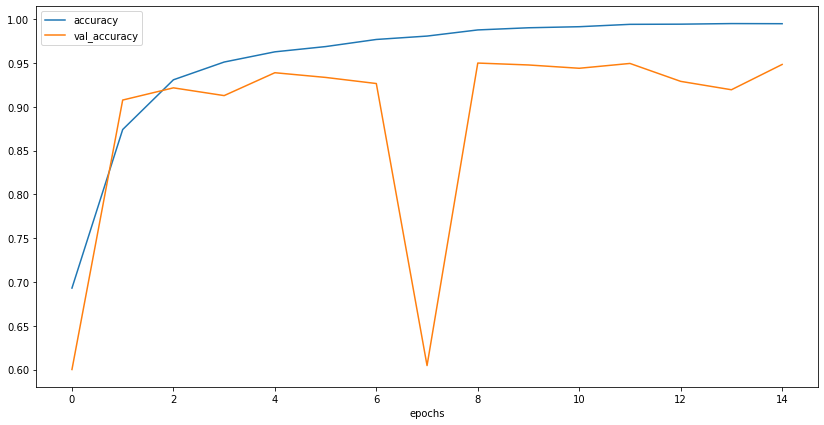

In [0]:
df1=pd.DataFrame(fit_cnn.history)[["accuracy", "val_accuracy"]]
df2=pd.DataFrame(fit_cnn2.history)[["accuracy", "val_accuracy"]]
df1.append(df2, ignore_index=True).plot(figsize=(14,7))
plt.xlabel("epochs")
plt.show()

Here we can see that with a simple CNN with two small convolutional blocks we achieved more of 99.5% accuracy for the training set but around 94% in the validation set. Nonetheless we achieved at most 94.99% accuracy in the validation set after epoch 9.

We can see that after 8-9 epochs of training, the model tends to overfit. Moreover we can make the hypothesis that the model is maybe subject to instability. At epoch 8, the validation accuracy fell to only 60% of accuracy. In other words, changing a little the weight of the CNN had a big impact on the test prediction.

## **Question 3.2**

Augment the data using rotations, mirroring and possibly other transformations. How much can you improve your original model by data augmentation?


In [0]:
datagen = ImageDataGenerator(rotation_range=90,
                              horizontal_flip=True,
                              vertical_flip=True)

datagen.fit(X_train)

In [0]:
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(100,100,3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(BatchNormalization())

cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(BatchNormalization())

cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(2, activation='softmax'))

cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
#cnn.summary()

In [0]:
fit_cnn = cnn.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=15, verbose=1, validation_data=(X_test,y_test))

Epoch 1/15
646/646 [==============================] - 64s 100ms/step - loss: 0.6322 - accuracy: 0.6896 - val_loss: 0.4580 - val_accuracy: 0.7769
Epoch 2/15
646/646 [==============================] - 58s 89ms/step - loss: 0.2824 - accuracy: 0.8883 - val_loss: 0.1923 - val_accuracy: 0.9286
Epoch 3/15
646/646 [==============================] - 57s 89ms/step - loss: 0.2088 - accuracy: 0.9261 - val_loss: 0.3862 - val_accuracy: 0.8755
Epoch 4/15
646/646 [==============================] - 57s 89ms/step - loss: 0.1832 - accuracy: 0.9363 - val_loss: 0.1655 - val_accuracy: 0.9428
Epoch 5/15
646/646 [==============================] - 57s 89ms/step - loss: 0.1762 - accuracy: 0.9406 - val_loss: 0.5603 - val_accuracy: 0.7785
Epoch 6/15
646/646 [==============================] - 57s 89ms/step - loss: 0.1686 - accuracy: 0.9431 - val_loss: 0.1746 - val_accuracy: 0.9388
Epoch 7/15
646/646 [==============================] - 57s 89ms/step - loss: 0.1641 - accuracy: 0.9443 - val_loss: 0.1454 - val_accuracy

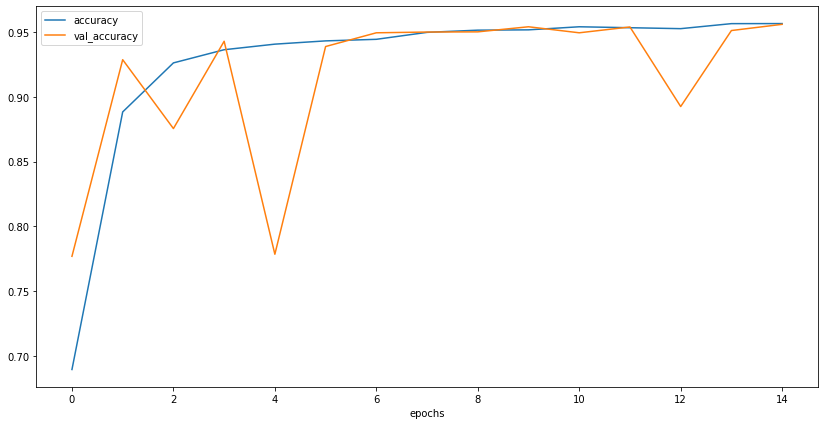

In [0]:
pd.DataFrame(fit_cnn.history)[["accuracy", "val_accuracy"]].plot(figsize=(14,7))
plt.xlabel("epochs")
plt.show()

The data-augmentation make the results better. Now we achieve 95.6% on the test dataset. Moreover the neural network seems to be more robust to instabilities. Here we can see several drops of the validation accuracy, but they are still of 78% and 89% of accuracy. Thus better than the 66% we got earlier.

Another great improvement is the robustness to overfitting. Here can see that both the training and the test accuracy are around 95-95.5% of accuracy.

## **Question 3.3**

Build a deeper model using residual connections. Show that you can build a deep model that would not be able to learn if you remove the residual connections (i.e. compare a deep model with and without residual connections while the rest of the architecture is constant). 

Feel free to reuse existing architectures from the literature or use them as inspiration for your own. You can find commonly used architectures here: https://keras.io/applications/

However, the point of the exercise is to learn the weights from scratch, so please do not reuse the weights shipped with these applications.


---





First of all we try a ResNet like model with 4 convolutional blocks and 2 skip connections. In this question we will keep using the data augmentation as it gave a good improvement.

In [0]:
inputs = Input(shape=(100, 100, 3))
conv1_1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
conv1_2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1_1)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1_2)

conv2_1 = Conv2D(64, (3, 3), activation='relu', padding='same')(maxpool1)
conv2_2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2_1)
skip2 = Add()([maxpool1, conv2_2])
bn2 = BatchNormalization()(skip2)
maxpool2 = MaxPooling2D(pool_size=(2, 2))(bn2)

conv3_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool2)
conv3_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3_1)
maxpool3 = MaxPooling2D(pool_size=(2, 2))(conv3_1)

conv4_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool3)
conv4_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4_1)
skip4 = Add()([maxpool3, conv4_2])
bn4 = BatchNormalization()(skip4)
maxpool4 = MaxPooling2D(pool_size=(2, 2))(bn4)

flat = Flatten()(maxpool4)
dense1 = Dense(1024, activation='relu')(flat)
dense2 = Dense(64, activation='relu')(dense1)
predictions = Dense(2, activation='softmax')(dense2)


resnn = Model(inputs=inputs, outputs=predictions)

resnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
#resnn.summary()

In [0]:
fit_resnn = resnn.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=15, verbose=1, validation_data=(X_test,y_test))

Epoch 1/15
646/646 [==============================] - 62s 96ms/step - loss: 0.2819 - accuracy: 0.8844 - val_loss: 0.1602 - val_accuracy: 0.9453
Epoch 2/15
646/646 [==============================] - 61s 95ms/step - loss: 0.1486 - accuracy: 0.9537 - val_loss: 0.1550 - val_accuracy: 0.9550
Epoch 3/15
646/646 [==============================] - 61s 95ms/step - loss: 0.1380 - accuracy: 0.9561 - val_loss: 0.2385 - val_accuracy: 0.9202
Epoch 4/15
646/646 [==============================] - 60s 93ms/step - loss: 0.1329 - accuracy: 0.9583 - val_loss: 0.1275 - val_accuracy: 0.9617
Epoch 5/15
646/646 [==============================] - 60s 92ms/step - loss: 0.1295 - accuracy: 0.9575 - val_loss: 0.1207 - val_accuracy: 0.9597
Epoch 6/15
646/646 [==============================] - 60s 92ms/step - loss: 0.1248 - accuracy: 0.9581 - val_loss: 0.1808 - val_accuracy: 0.9444
Epoch 7/15
646/646 [==============================] - 59s 92ms/step - loss: 0.1235 - accuracy: 0.9597 - val_loss: 0.1183 - val_accuracy:

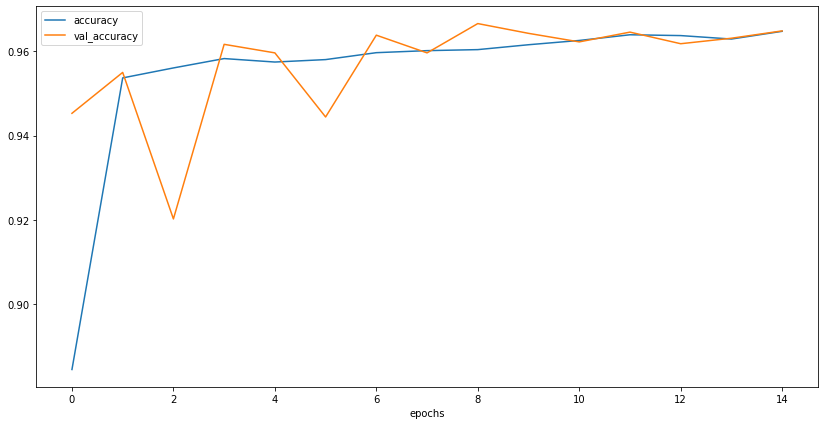

In [0]:
pd.DataFrame(fit_resnn.history)[["accuracy", "val_accuracy"]].plot(figsize=(14,7))
plt.xlabel("epochs")
plt.show()

With this model we achieved at most 96.66% on the test dataset which is 1% more than what we had with previous model. Thus skip connections greatly improved the learning ability of the Network.

Again the data augmentation prevented overfitting. However we can observe that the model is very stable and there is no more drop down of the test accuracy. This is probably thanks to the residual connections.

Now let's do the same thing without the residual connections.


In [0]:
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(100,100,3)))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(BatchNormalization())

cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(BatchNormalization())

cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(2, activation='softmax'))

cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
#cnn.summary()

In [0]:
fit_cnn = cnn.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=15, verbose=1, validation_data=(X_test,y_test))

Epoch 1/15
646/646 [==============================] - 62s 95ms/step - loss: 0.2985 - accuracy: 0.8754 - val_loss: 0.2342 - val_accuracy: 0.9221
Epoch 2/15
646/646 [==============================] - 60s 93ms/step - loss: 0.1926 - accuracy: 0.9385 - val_loss: 0.2210 - val_accuracy: 0.9414
Epoch 3/15
646/646 [==============================] - 60s 92ms/step - loss: 0.1805 - accuracy: 0.9411 - val_loss: 0.1638 - val_accuracy: 0.9524
Epoch 4/15
646/646 [==============================] - 60s 93ms/step - loss: 0.1778 - accuracy: 0.9440 - val_loss: 0.2686 - val_accuracy: 0.9128
Epoch 5/15
646/646 [==============================] - 60s 93ms/step - loss: 0.1750 - accuracy: 0.9430 - val_loss: 0.3799 - val_accuracy: 0.8524
Epoch 6/15
646/646 [==============================] - 60s 93ms/step - loss: 0.1786 - accuracy: 0.9418 - val_loss: 0.4349 - val_accuracy: 0.8054
Epoch 7/15
646/646 [==============================] - 60s 93ms/step - loss: 0.1657 - accuracy: 0.9469 - val_loss: 0.1632 - val_accuracy:

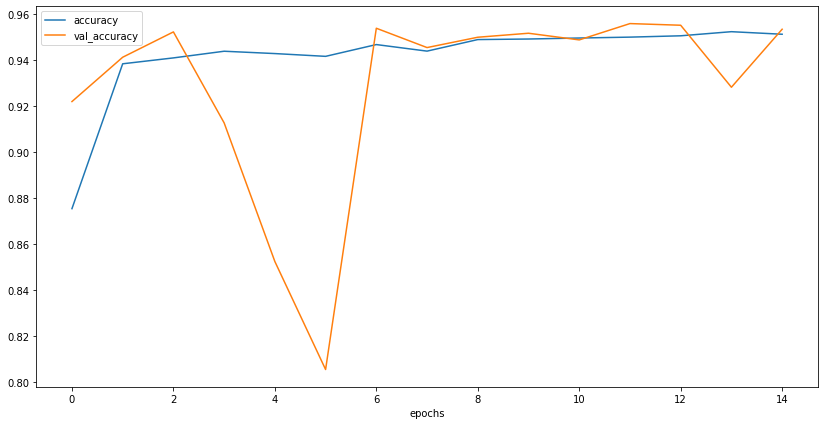

In [0]:
pd.DataFrame(fit_cnn.history)[["accuracy", "val_accuracy"]].plot(figsize=(14,7))
plt.xlabel("epochs")
plt.show()

Here we achieved 95.6% of accuracy with the test dataset. It is exactly what we had with the tiny CNN we had in Question 3.2

In other words, the CNN without the skip connections was not able to learn. We then infer that residual connections help us to train deeper Networks. Finally, we can see again that the CNN is subject to instabilities.

**ResNet**

Let's finish with a comparison with ResNet

In [0]:
from keras.applications.resnet import ResNet50

model = ResNet50(input_shape=(100,100,3), weights=None, include_top=True, classes=2)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

fit_resnet = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=15, verbose=1, validation_data=(X_test,y_test))

Epoch 1/15
646/646 [==============================] - 124s 192ms/step - loss: 0.4122 - accuracy: 0.8388 - val_loss: 0.3337 - val_accuracy: 0.8993
Epoch 2/15
646/646 [==============================] - 107s 165ms/step - loss: 0.1710 - accuracy: 0.9477 - val_loss: 0.2964 - val_accuracy: 0.9141
Epoch 3/15
646/646 [==============================] - 107s 166ms/step - loss: 0.1596 - accuracy: 0.9474 - val_loss: 0.1628 - val_accuracy: 0.9499
Epoch 4/15
646/646 [==============================] - 107s 165ms/step - loss: 0.1423 - accuracy: 0.9533 - val_loss: 0.2162 - val_accuracy: 0.9478
Epoch 5/15
646/646 [==============================] - 107s 165ms/step - loss: 0.1394 - accuracy: 0.9537 - val_loss: 0.1382 - val_accuracy: 0.9512
Epoch 6/15
646/646 [==============================] - 107s 166ms/step - loss: 0.1302 - accuracy: 0.9566 - val_loss: 0.1581 - val_accuracy: 0.9414
Epoch 7/15
646/646 [==============================] - 107s 165ms/step - loss: 0.1343 - accuracy: 0.9550 - val_loss: 0.1574 -

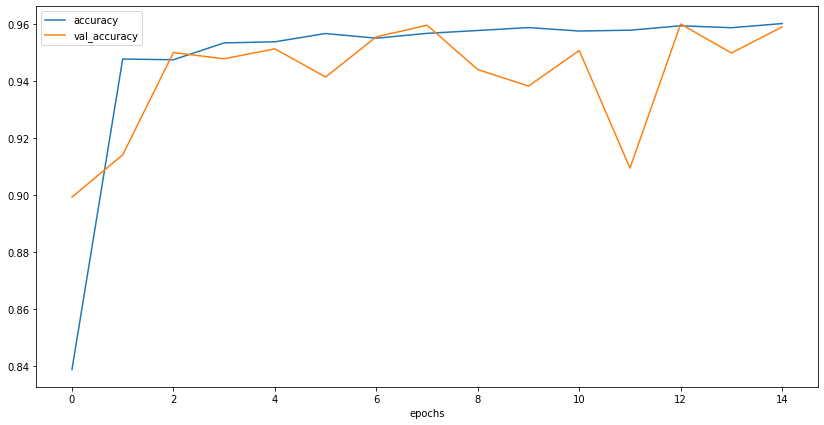

In [0]:
pd.DataFrame(fit_resnet.history)[["accuracy", "val_accuracy"]].plot(figsize=(14,7))
plt.xlabel("epochs")
plt.show()

We can see that the ResNet achieved 96% of accuracy at most on the test dataset, and is subject to instability. As a conclusion our ResNet like model from the beginning of this question is more adapted to our problem.

## **3.4 BONUS / Optional: Transfer learning**

Reuse an existing architecture from keras (https://keras.io/applications/) and compare retraining only the densely connected layer with fine-tuning the whole network.


---




We will compare to first a pretrained VGG16 and then a ResNet101.

In [0]:
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam

transfer = VGG16(input_shape=(100,100,3), weights='imagenet', include_top=False)
tensor = transfer.output
tensor = GlobalAveragePooling2D()(tensor)
tensor = Dense(1024, activation='relu')(tensor)
predictions = Dense(2, activation='softmax')(tensor)

model = Model(inputs=transfer.input, outputs=predictions)

# Freeze the weights
for layer in transfer.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

fit_x = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, verbose=1, validation_data=(X_test,y_test))

Epoch 1/10
646/646 [==============================] - 75s 115ms/step - loss: 0.3637 - accuracy: 0.8569 - val_loss: 0.2743 - val_accuracy: 0.8853
Epoch 2/10
646/646 [==============================] - 65s 101ms/step - loss: 0.2539 - accuracy: 0.9034 - val_loss: 0.2338 - val_accuracy: 0.9078
Epoch 3/10
646/646 [==============================] - 66s 102ms/step - loss: 0.2282 - accuracy: 0.9149 - val_loss: 0.2485 - val_accuracy: 0.8974
Epoch 4/10
646/646 [==============================] - 65s 100ms/step - loss: 0.2218 - accuracy: 0.9170 - val_loss: 0.2023 - val_accuracy: 0.9266
Epoch 5/10
646/646 [==============================] - 66s 103ms/step - loss: 0.2162 - accuracy: 0.9189 - val_loss: 0.2126 - val_accuracy: 0.9152
Epoch 6/10
646/646 [==============================] - 65s 100ms/step - loss: 0.2069 - accuracy: 0.9221 - val_loss: 0.1945 - val_accuracy: 0.9280
Epoch 7/10
646/646 [==============================] - 65s 101ms/step - loss: 0.2026 - accuracy: 0.9269 - val_loss: 0.2004 - val_ac

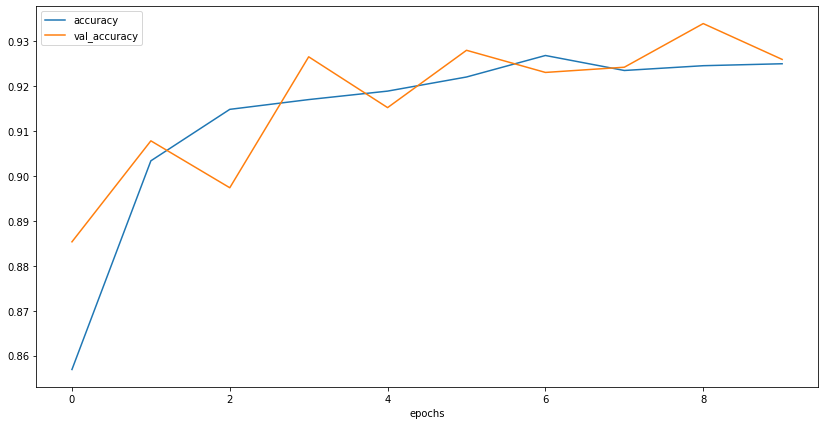

In [0]:
pd.DataFrame(fit_x.history)[["accuracy", "val_accuracy"]].plot(figsize=(14,7))
plt.xlabel("epochs")
plt.show()

The pretrained VGG16 achieves at most 93.4% of accuracy on the test dataset. This is less than our baseline from question 3.1. In other words VGG16 is not adapted to our problem.

In [0]:
from keras.applications.resnet import ResNet101
import keras.backend as K


transfer = ResNet101(input_shape=(100,100,3), weights='imagenet', include_top=False)
tensor = transfer.output
tensor = Flatten()(tensor)
tensor = Dense(1024, activation='relu')(tensor)
predictions = Dense(2, activation='softmax')(tensor)

model = Model(inputs=transfer.input, outputs=predictions)

# Freeze the weights
# Due to some issues with Batch Normalization layers we have to deal with them separately
# See: https://github.com/keras-team/keras/issues/9214
for layer in transfer.layers:
  if hasattr(layer, 'moving_mean') and hasattr(layer, 'moving_variance'):
    layer.trainable = True
    K.eval(K.update(layer.moving_mean, K.zeros_like(layer.moving_mean)))
    K.eval(K.update(layer.moving_variance, K.zeros_like(layer.moving_variance)))
  else:
    layer.trainable = False


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

fit_x = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, verbose=1, validation_data=(X_test,y_test))

Epoch 1/10
646/646 [==============================] - 531s 821ms/step - loss: 0.4949 - accuracy: 0.9115 - val_loss: 10.3320 - val_accuracy: 0.5509
Epoch 2/10
646/646 [==============================] - 497s 770ms/step - loss: 0.1672 - accuracy: 0.9422 - val_loss: 0.3005 - val_accuracy: 0.9295
Epoch 3/10
646/646 [==============================] - 497s 770ms/step - loss: 0.1461 - accuracy: 0.9483 - val_loss: 0.2403 - val_accuracy: 0.9443
Epoch 4/10
646/646 [==============================] - 498s 771ms/step - loss: 0.1367 - accuracy: 0.9523 - val_loss: 0.2148 - val_accuracy: 0.9466
Epoch 5/10
646/646 [==============================] - 498s 770ms/step - loss: 0.1230 - accuracy: 0.9572 - val_loss: 0.1680 - val_accuracy: 0.9533
Epoch 6/10
646/646 [==============================] - 497s 770ms/step - loss: 0.1208 - accuracy: 0.9575 - val_loss: 0.1885 - val_accuracy: 0.9495
Epoch 7/10
646/646 [==============================] - 494s 765ms/step - loss: 0.1127 - accuracy: 0.9600 - val_loss: 0.2260 

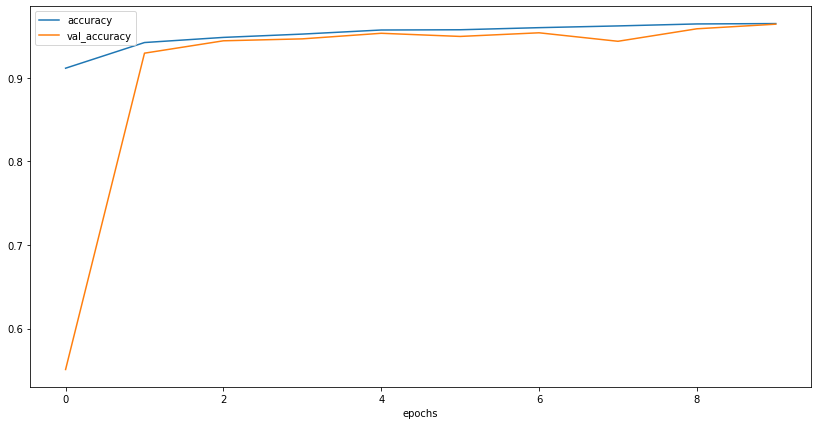

In [0]:
pd.DataFrame(fit_x.history)[["accuracy", "val_accuracy"]].plot(figsize=(14,7))
plt.xlabel("epochs")
plt.show()

We can see that the pretrained ResNet101 acheive at most 96.5% of accuracy on the test dataset which is as good as our model from question 3.3

Nonetheless this high score is not as stable as the one of question 3.3. Indeed, here the resnet stabilize itself around 95% of accuracy while our model from 3.3 stabilize itself at more than 96% of accuracy.